<a href="https://colab.research.google.com/github/superahxd/sec1_project/blob/main/sec1_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#💥GOAL

다음 분기에 어떤 게임을 설계해야 할까

1. 지역에 따라서 선호하는 게임 장르가 다를까
2. 연도별 게임의 트렌드가 있을까
3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

# 🕹️ Data Description
Name : 게임의 이름입니다.

Platform : 게임이 지원되는 플랫폼의 이름입니다.

Year : 게임이 출시된 연도입니다.

Genre : 게임의 장르입니다.

Publisher : 게임을 제작한 회사입니다.

NA_Sales : 북미지역에서의 출고량입니다.

EU_Sales : 유럽지역에서의 출고량입니다.

JP_Sales : 일본지역에서의 출고량입니다.

Other_Sales : 기타지역에서의 출고량입니다.

In [622]:
import pandas as pd

vgames = pd.read_csv('/content/vgames2.csv')

In [623]:
vgames.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [624]:
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    return float(x)


vgames['NA_Sales']=vgames['NA_Sales'].apply(value_to_float)
vgames['EU_Sales']=vgames['EU_Sales'].apply(value_to_float)
vgames['JP_Sales']=vgames['JP_Sales'].apply(value_to_float)
vgames['Other_Sales']=vgames['Other_Sales'].apply(value_to_float)

In [625]:
def million(x):
 if x <= 100:
   return x * 1000000.0
 else: return x

vgames['NA_Sales']=vgames['NA_Sales'].apply(million)
vgames['EU_Sales']=vgames['EU_Sales'].apply(million)
vgames['JP_Sales']=vgames['JP_Sales'].apply(million)
vgames['Other_Sales']=vgames['Other_Sales'].apply(million)

In [626]:
def division(x):
  if x > 0:
    return x / 1000
  else: return x

vgames['NA_Sales']=vgames['NA_Sales'].apply(division)
vgames['EU_Sales']=vgames['EU_Sales'].apply(division)
vgames['JP_Sales']=vgames['JP_Sales'].apply(division)
vgames['Other_Sales']=vgames['Other_Sales'].apply(division)

In [627]:
def year(x):
  if x >= 80 and x <= 100:
   return x + 1900
  elif x < 80:
   return x + 2000
  else : return float(x)

vgames['Year']=vgames['Year'].apply(year)

In [628]:
vgames['Year'].isna().sum()

271

In [629]:
vgames=vgames.iloc[:,1:]
vgames.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,40.0,0.0,0.0,0.0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,170.0,0.0,0.0,10.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.0,0.0,20.0,0.0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,40.0,0.0,0.0,0.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,120.0,90.0,0.0,40.0


1. 🌏지역에 따른 게임 장르 선호도

지역에 따라서 선호하는 게임 장르가 다를까



In [630]:
import matplotlib.pyplot as plt
import numpy as np

In [631]:
vgames['Genre'] = vgames['Genre'].dropna()
vgames_1=vgames.iloc[:,3:]
vgames_1

,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,Destineer,40.0,0.0,0.0,0.0
1,Action,Namco Bandai Games,170.0,0.0,0.0,10.0
2,Adventure,Alchemist,0.0,0.0,20.0,0.0
3,Misc,Zoo Games,40.0,0.0,0.0,0.0
4,Platform,D3Publisher,120.0,90.0,0.0,40.0
...,...,...,...,...,...,...
16593,Platform,Vivendi Games,150.0,40.0,0.0,10.0
16594,Action,Rising Star Games,10.0,0.0,0.0,0.0
16595,Sports,Take-Two Interactive,440.0,190.0,30.0,130.0
16596,Action,Tecmo Koei,50.0,50.0,250.0,30.0


In [632]:
vgames_sum= vgames_1.groupby(['Genre']).sum()
vgames_sum= vgames_sum.T

In [633]:
vgames_mean= vgames_1.groupby(['Genre']).mean()
vgames_mean= vgames_mean.T
vgames_mean

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
NA_Sales,264.692890,82.546875,263.518300,235.322953,505.022624,213.408304,287.361223,215.468645,444.892966,211.514451,290.696284,101.029412
EU_Sales,157.990923,50.039062,119.504132,122.468281,228.065611,87.768166,190.748190,123.789616,239.334862,131.040462,160.820162,66.647059
JP_Sales,47.776097,40.585938,103.116883,60.709343,147.794118,98.391003,45.374095,232.602832,29.266055,73.641618,57.825716,72.735294
Other_Sales,56.414523,13.132812,43.258560,42.698962,58.291855,21.660900,62.027353,38.408631,78.478593,36.393064,57.526698,16.705882


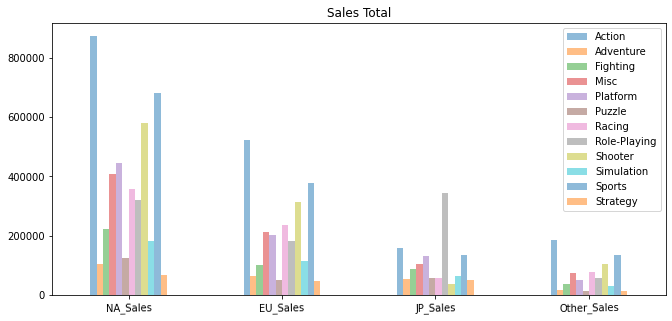

In [634]:
vgames_sum.plot(kind='bar',figsize=(11,5), rot=1, legend='reverse', alpha = 0.5, title='Sales Total')
plt.legend(loc='best')

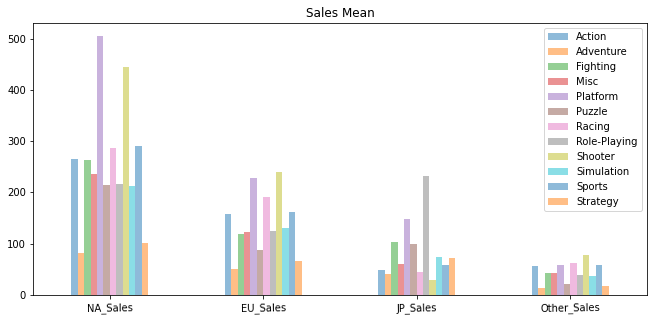

In [635]:
vgames_mean.plot(kind='bar',figsize=(11,5), rot=1, legend='reverse', alpha = 0.5, title='Sales Mean')
plt.legend(loc='best')

In [636]:
vgames_1.rank(method='min', ascending=False)

,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,13244.0,12822.0,9951.0,10869.0,6144.0,10122.0
1,13244.0,6971.0,5214.0,10869.0,6144.0,6677.0
2,11964.0,14899.0,12100.0,10869.0,4712.0,10122.0
3,9383.0,38.0,9951.0,10869.0,6144.0,10122.0
4,8499.0,13074.0,6495.0,4522.0,6144.0,3490.0
...,...,...,...,...,...,...
16593,8499.0,471.0,5639.0,6422.0,6144.0,6677.0
16594,13244.0,5610.0,11559.0,10869.0,6144.0,10122.0
16595,681.0,2389.0,2360.0,2784.0,4184.0,1303.0
16596,13244.0,2046.0,9421.0,5876.0,1223.0,4156.0



|인기종목 |1st | 2nd | 3rd |
|:-:|:-:|:-:|:-:|
|북미|Platform|Shooter|simulation|
|유럽|Shooter|Platform|Racing|
|일본|Role-Playing|Adventure|Fighting|
|그외|Shooter|Racing|Platform|

<br/>

|비인기종목 |1st | 2nd | 3rd |
|:-:|:-:|:-:|:-:|
|북미|Adventure	|Strategy|Sports|
|유럽|Adventure	|Strategy|Puzzle|
|일본|Shooter|Platform|Racing|
|그외|Adventure	|Strategy|Platform|


In [637]:
vgames_sum.T.corr(method = 'pearson')

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
NA_Sales,1.000000,0.986691,0.281985,0.975300
EU_Sales,0.986691,1.000000,0.276935,0.994328
JP_Sales,0.281985,0.276935,1.000000,0.263143
Other_Sales,0.975300,0.994328,0.263143,1.000000


In [638]:
vgames_mean.T.corr(method = 'pearson')

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
NA_Sales,1.000000,0.942013,0.090237,0.848262
EU_Sales,0.942013,1.000000,-0.034968,0.950424
JP_Sales,0.090237,-0.034968,1.000000,-0.151028
Other_Sales,0.848262,0.950424,-0.151028,1.000000


2. 📅연도별 트랜드 변화

In [647]:
vgames_2_Genre = vgames.iloc[:, 2:4]
vgames_2_Genre['sales'] = vgames.iloc[:, 5:].sum(axis = 1, skipna = True)

In [657]:
pivot_vgames = pd.pivot_table(vgames_2_Genre, 'sales', ['Year', 'Genre'], aggfunc = 'sum')
pivot_vgames

sales
Year   Genre                
1980.0 Action          340.0
       Fighting        770.0
       Misc           2700.0
       Shooter        7070.0
1981.0 Action        14790.0
...                      ...
2016.0 Sports        14630.0
       Strategy        520.0
2017.0 Action           10.0
       Role-Playing     40.0
2020.0 Simulation      290.0

[388 rows x 1 columns]

In [663]:
def vgames_2(year, genre):
    data = pivot_vgames.loc[Year, Genre]

    pp.plot(data.index, data.values)

vgames_2(2010, 'Action')

NameError: ignored

Empty DataFrame
Columns: []
Index: [(1980.0, Action, 340.0), (1980.0, Fighting, 770.0), (1980.0, Misc, 230.0), (1980.0, Misc, 270.0), (1980.0, Misc, 1050.0), (1980.0, Misc, 1150.0), (1980.0, Shooter, 2760.0), (1980.0, Shooter, 4310.0), (1980.0, nan, 500.0), (1981.0, Action, 160.0), (1981.0, Action, 220.0), (1981.0, Action, 220.0), (1981.0, Action, 230.0), (1981.0, Action, 290.0), (1981.0, Action, 310.0), (1981.0, Action, 320.0), (1981.0, Action, 340.0), (1981.0, Action, 350.0), (1981.0, Action, 370.0), (1981.0, Action, 380.0), (1981.0, Action, 390.0), (1981.0, Action, 400.0), (1981.0, Action, 420.0), (1981.0, Action, 450.0), (1981.0, Action, 500.0), (1981.0, Action, 590.0), (1981.0, Action, 670.0), (1981.0, Action, 700.0), (1981.0, Action, 770.0), (1981.0, Action, 790.0), (1981.0, Action, 820.0), (1981.0, Action, 930.0), (1981.0, Action, 1970.0), (1981.0, Action, 2200.0), (1981.0, Platform, 960.0), (1981.0, Platform, 1460.0), (1981.0, Platform, 4500.0), (1981.0, Puzzle, 590.0), (1981.0, Puzzle, 1660.0), (1981.0, Racing, 480.0), (1981.0, Shooter, 220.0), (1981.0, Shooter, 230.0), (1981.0, Shooter, 340.0), (1981.0, Shooter, 730.0), (1981.0, Shooter, 1050.0), (1981.0, Shooter, 1100.0), (1981.0, Shooter, 1270.0), (1981.0, Shooter, 1350.0), (1981.0, Shooter, 1600.0), (1981.0, Shooter, 2130.0), (1981.0, Simulation, 440.0), (1981.0, Sports, 130.0), (1981.0, Sports, 190.0), (1981.0, Sports, 210.0), (1981.0, Sports, 250.0), (1982.0, Action, 140.0), (1982.0, Action, 150.0), (1982.0, Action, 160.0), (1982.0, Action, 220.0), (1982.0, Action, 240.0), (1982.0, Action, 280.0), (1982.0, Action, 280.0), (1982.0, Action, 310.0), (1982.0, Action, 320.0), (1982.0, Action, 340.0), (1982.0, Action, 340.0), (1982.0, Action, 370.0), (1982.0, Action, 390.0), (1982.0, Action, 500.0), (1982.0, Action, 540.0), (1982.0, Action, 620.0), (1982.0, Action, 630.0), (1982.0, Action, 670.0), (1982.0, Misc, 870.0), (1982.0, Platform, 540.0), (1982.0, Platform, 720.0), (1982.0, Platform, 1080.0), (1982.0, Platform, 1100.0), (1982.0, Platform, 1590.0), (1982.0, Puzzle, 590.0), (1982.0, Puzzle, 1640.0), (1982.0, Puzzle, 7810.0), (1982.0, Racing, 390.0), (1982.0, Racing, 1180.0), (1982.0, Shooter, 510.0), (1982.0, Shooter, 620.0), (1982.0, Shooter, 780.0), (1982.0, Shooter, 780.0), (1982.0, Shooter, 1120.0), (1982.0, Sports, 500.0), (1982.0, Sports, 560.0), (1983.0, Action, 160.0), (1983.0, Action, 290.0), (1983.0, Action, 330.0), (1983.0, Action, 340.0), (1983.0, Action, 460.0), (1983.0, Action, 510.0), (1983.0, Action, 770.0), (1983.0, Adventure, 400.0), (1983.0, Misc, 2140.0), ...]

[16598 rows x 0 columns]